In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
import scipy.stats as stats
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [36]:
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

# Replace the issue of booking template, if strip search occurs, formal booking will take place. 
data.loc[data['StripSearch'] == 1, ['Booked']] = 1

#EDA
data.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [38]:
data_clean = data.drop(['Arrest_Year','Arrest_Month','Youth_at_arrest__under_18_years','Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','EventID','ArrestID','PersonID','ArrestLocDiv','ItemsFound','ObjectId','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence'], axis=1)

In [39]:
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 65 years and older','Aged 65 and older')
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 17 years and under','Aged 17 and younger')
data_clean['Age_group__at_arrest_'] = data_clean['Age_group__at_arrest_'].replace('Aged 17 years and younger','Aged 17 and younger')

In [40]:
data_clean = data_clean.dropna(subset=['Age_group__at_arrest_'])
data_clean = data_clean.dropna(subset=['StripSearch'])
data_clean = data_clean.dropna(subset=['Booked'])
data_clean = data_clean.dropna(subset=['Perceived_Race'])
data_clean = data_clean.drop(data_clean[data_clean['Sex']=='U'].index)
data2 = data_clean
data_clean

,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,Booked
0,White,M,Aged 35 to 44 years,0,1
1,White,M,Aged 35 to 44 years,0,1
2,Unknown or Legacy,M,Aged 35 to 44 years,0,1
3,Black,M,Aged 25 to 34 years,0,0
4,South Asian,M,Aged 25 to 34 years,0,1
...,...,...,...,...,...
65271,Indigenous,F,Aged 25 to 34 years,0,0
65272,South Asian,M,Aged 35 to 44 years,0,1
65273,White,F,Aged 45 to 54 years,0,0
65274,Unknown or Legacy,M,Aged 17 and younger,0,0


In [41]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65239 entries, 0 to 65275
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Perceived_Race         65239 non-null  object
 1   Sex                    65239 non-null  object
 2   Age_group__at_arrest_  65239 non-null  object
 3   StripSearch            65239 non-null  int64 
 4   Booked                 65239 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [42]:
num = []
for col in data_clean:
    if data_clean[col].dtype != 'object':
        num.append(col)
print('Numerical Variables: ', num)

Numerical Variables:  ['StripSearch', 'Booked']


In [43]:
cat = []
for col in data_clean:
    if data_clean[col].dtype == 'object':
        cat.append(col)
print('Categorical Variables:', cat)

Categorical Variables: ['Perceived_Race', 'Sex', 'Age_group__at_arrest_']


In [44]:
print(data_clean.Perceived_Race.value_counts())
print(data_clean.Sex.value_counts())
print(data_clean.Age_group__at_arrest_.value_counts())

White                   27708
Black                   17518
Unknown or Legacy        5052
East/Southeast Asian     4412
South Asian              3613
Middle-Eastern           3237
Indigenous               1932
Latino                   1767
Name: Perceived_Race, dtype: int64
M    52631
F    12608
Name: Sex, dtype: int64
Aged 25 to 34 years    20944
Aged 35 to 44 years    16240
Aged 18 to 24 years    10038
Aged 45 to 54 years     9065
Aged 55 to 64 years     4588
Aged 17 and younger     3042
Aged 65 and older       1322
Name: Age_group__at_arrest_, dtype: int64


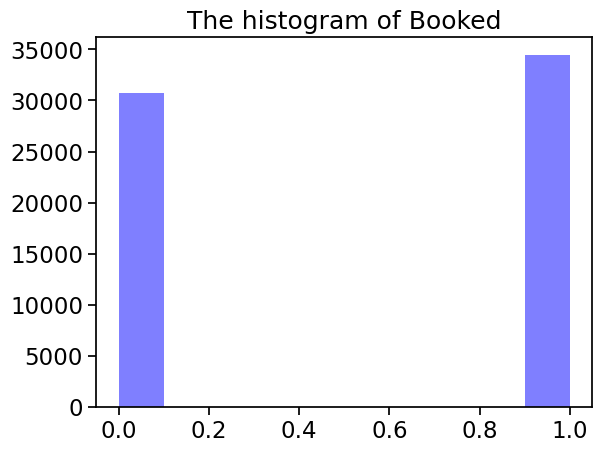

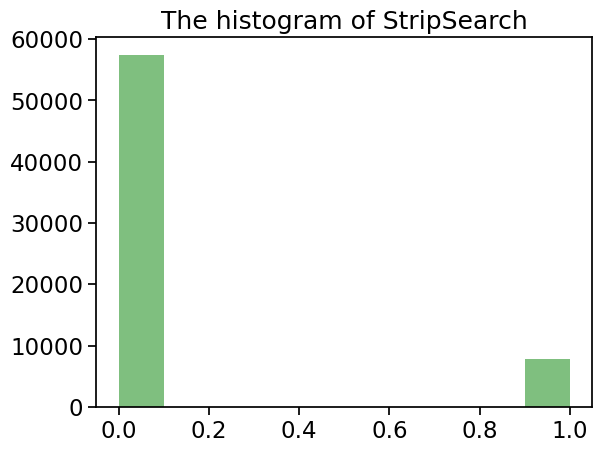

In [45]:
#Histogram of Booked and StripSearch

plt.hist(data_clean['Booked'], alpha = 0.5, color = 'blue')
plt.title('The histogram of Booked')
plt.show()
plt.hist(data_clean['StripSearch'], alpha = 0.5, color = 'green')
plt.title('The histogram of StripSearch')
plt.show()

In [46]:
#Countplot of Booked vs. Perceived_Race
bookedgroup = data_clean.groupby(['Perceived_Race', 'Booked'])
print(bookedgroup.size())

Perceived_Race        Booked
Black                 0          7685
                      1          9833
East/Southeast Asian  0          2302
                      1          2110
Indigenous            0           833
                      1          1099
Latino                0           793
                      1           974
Middle-Eastern        0          1588
                      1          1649
South Asian           0          1824
                      1          1789
Unknown or Legacy     0          2563
                      1          2489
White                 0         13177
                      1         14531
dtype: int64


Text(0.5, 1.0, 'Booked vs. Perceived_Race')

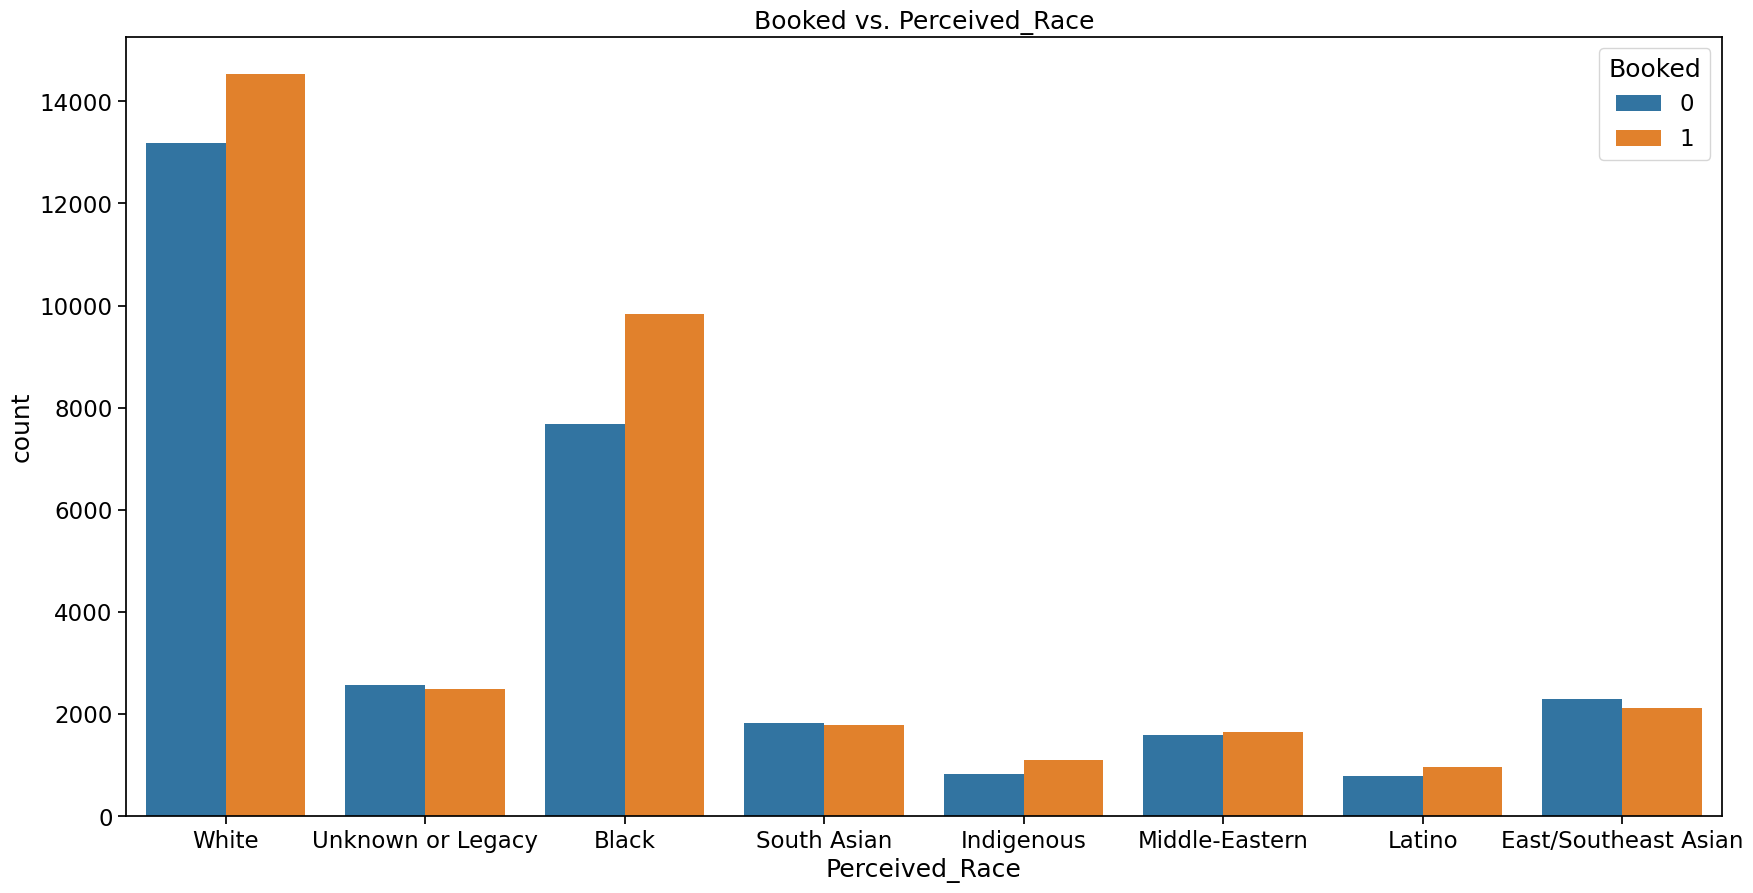

In [47]:
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Perceived_Race', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Perceived_Race')

Sex  Booked
F    0          7027
     1          5581
M    0         23738
     1         28893
dtype: int64


Text(0.5, 1.0, 'Booked vs. Sex')

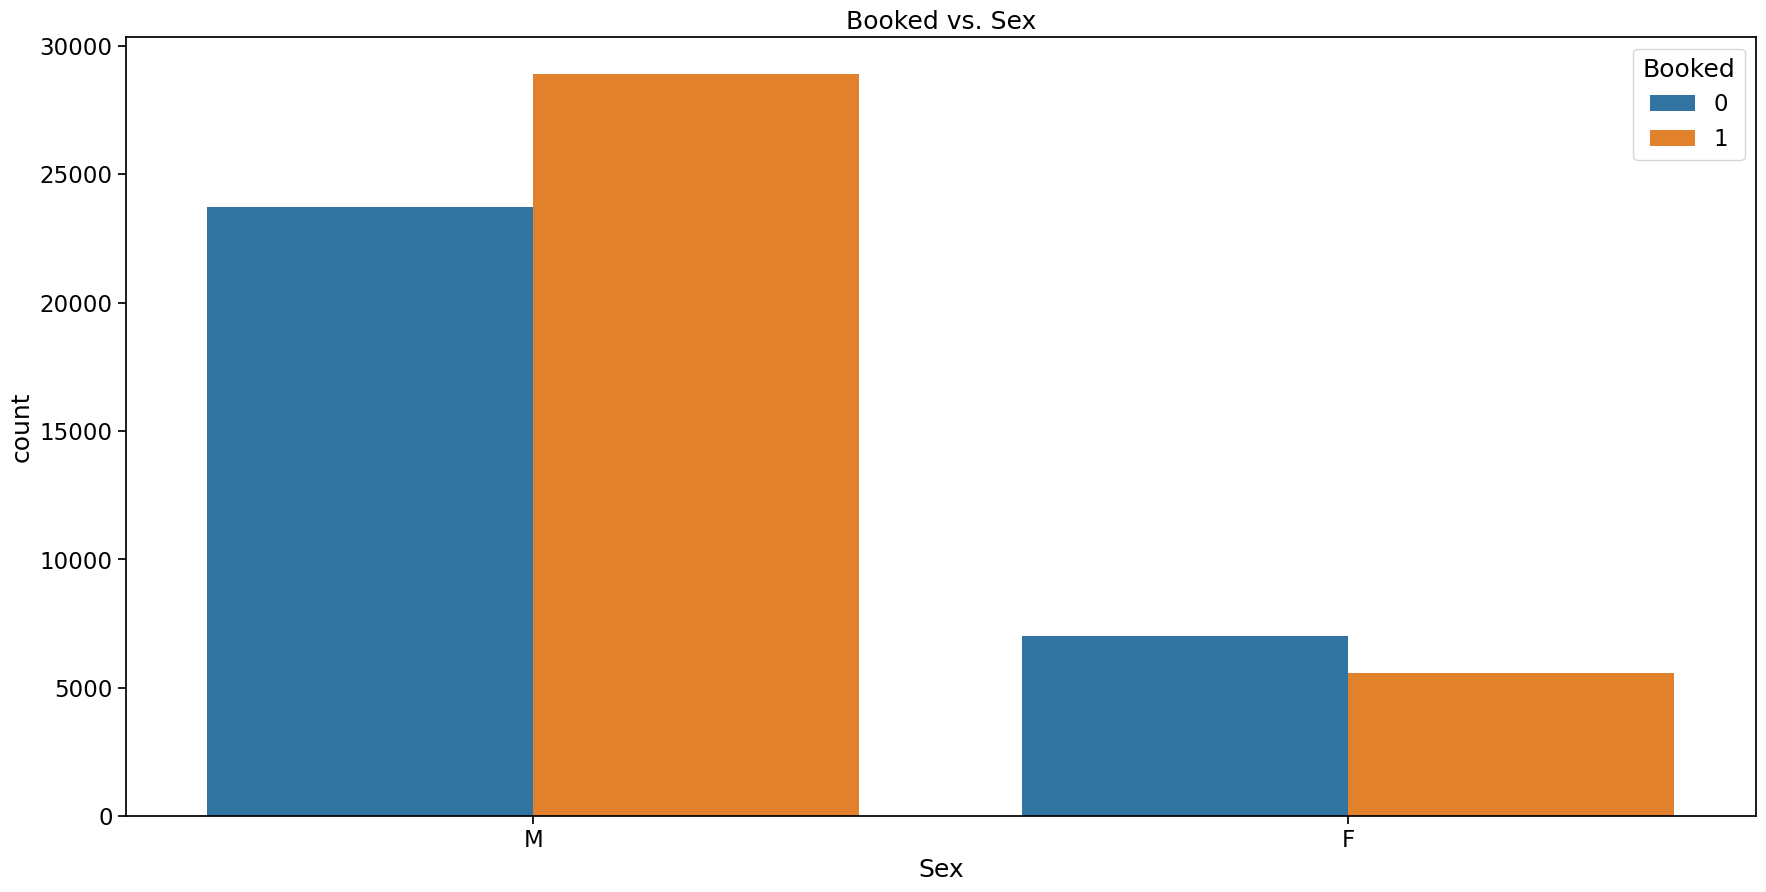

In [48]:
#Countplot of Booked vs. Sex
bookedgroup = data_clean.groupby(['Sex', 'Booked'])
print(bookedgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Sex', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Sex')

Age_group__at_arrest_  Booked
Aged 17 and younger    0          1790
                       1          1252
Aged 18 to 24 years    0          4711
                       1          5327
Aged 25 to 34 years    0          9259
                       1         11685
Aged 35 to 44 years    0          7362
                       1          8878
Aged 45 to 54 years    0          4364
                       1          4701
Aged 55 to 64 years    0          2453
                       1          2135
Aged 65 and older      0           826
                       1           496
dtype: int64


Text(0.5, 1.0, 'Booked vs. Age_group__at_arrest_')

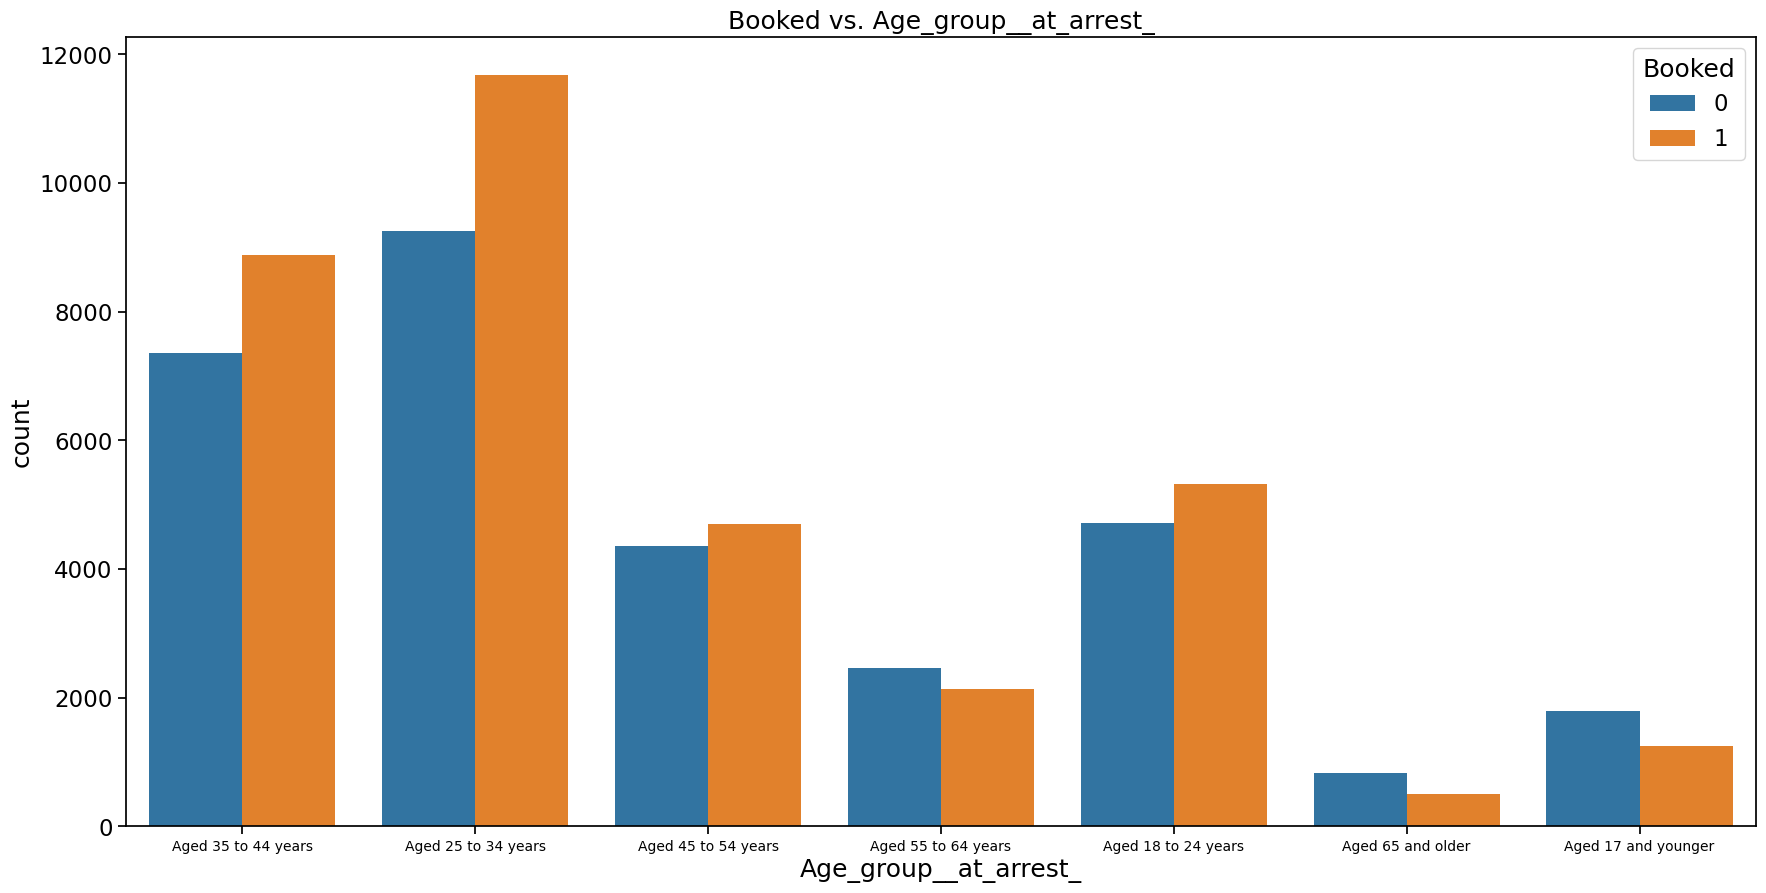

In [49]:
#Countplot of Booked vs. Age_group__at_arrest_
bookedgroup = data_clean.groupby(['Age_group__at_arrest_', 'Booked'])
print(bookedgroup.size())
plt.figure(figsize = (18, 9))
plt.xticks(fontsize = 10)
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Age_group__at_arrest_', hue = 'Booked')
plt.tight_layout()
plt.title('Booked vs. Age_group__at_arrest_')

Perceived_Race        StripSearch
Black                 0              15084
                      1               2434
East/Southeast Asian  0               4071
                      1                341
Indigenous            0               1626
                      1                306
Latino                0               1635
                      1                132
Middle-Eastern        0               3009
                      1                228
South Asian           0               3356
                      1                257
Unknown or Legacy     0               4516
                      1                536
White                 0              24142
                      1               3566
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Perceived_Race')

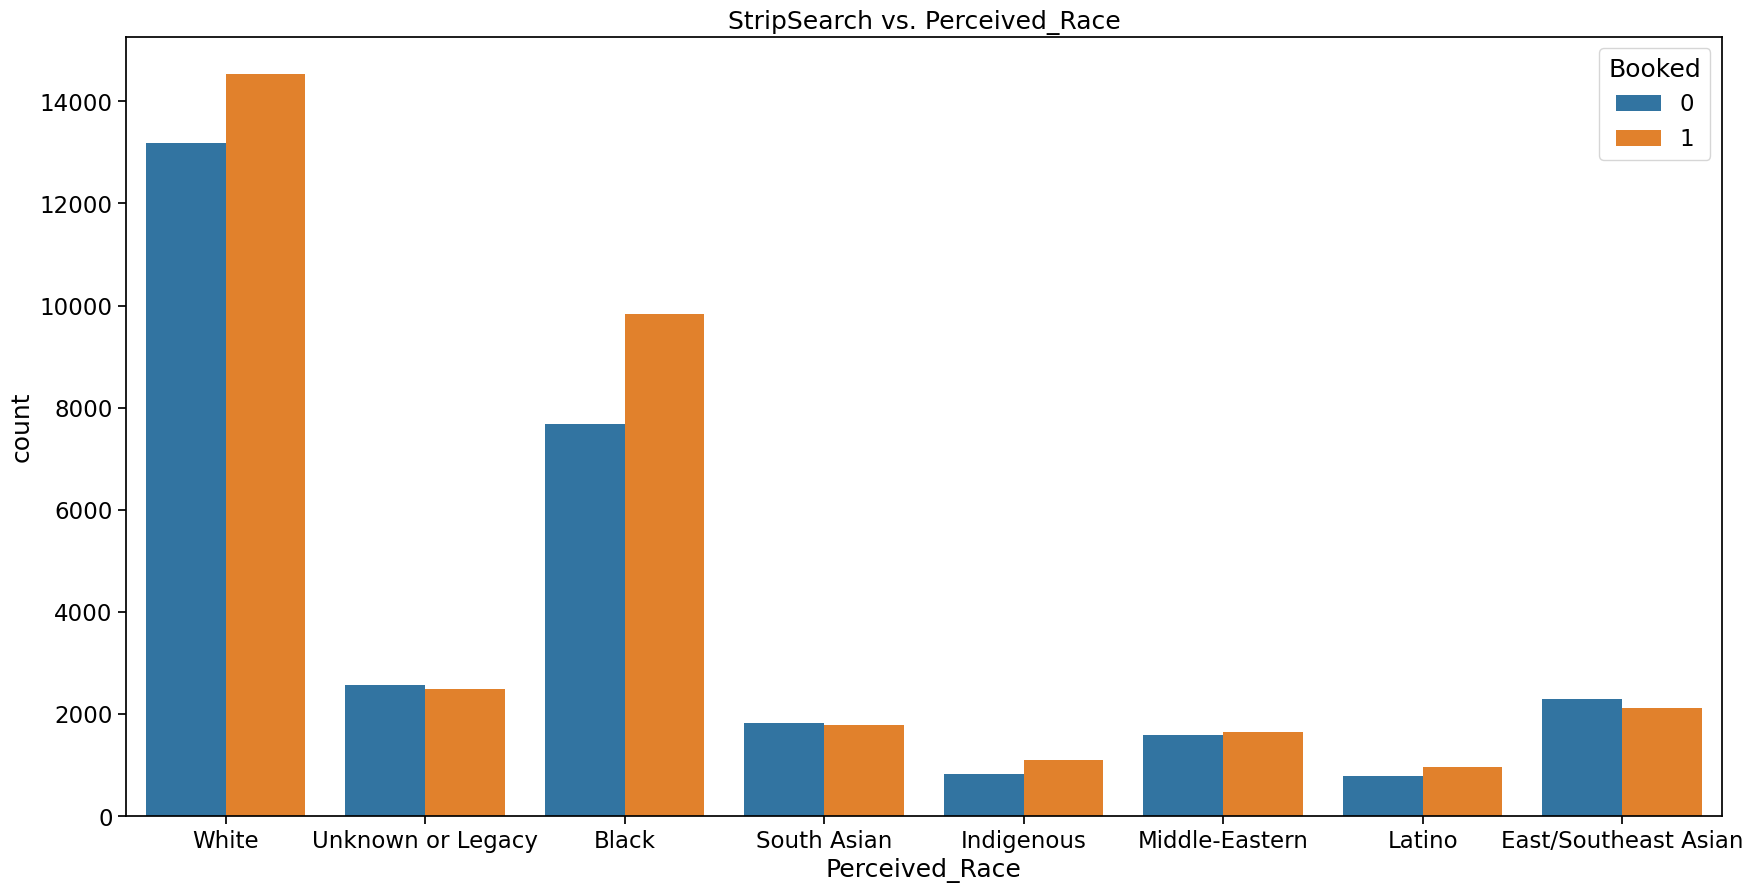

In [50]:
#Countplot of StripSearch vs. Perceived_Race
searchgroup = data_clean.groupby(['Perceived_Race', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Perceived_Race', hue = 'Booked')
plt.tight_layout()
plt.title('StripSearch vs. Perceived_Race')

Sex  StripSearch
F    0              11325
     1               1283
M    0              46114
     1               6517
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Sex')

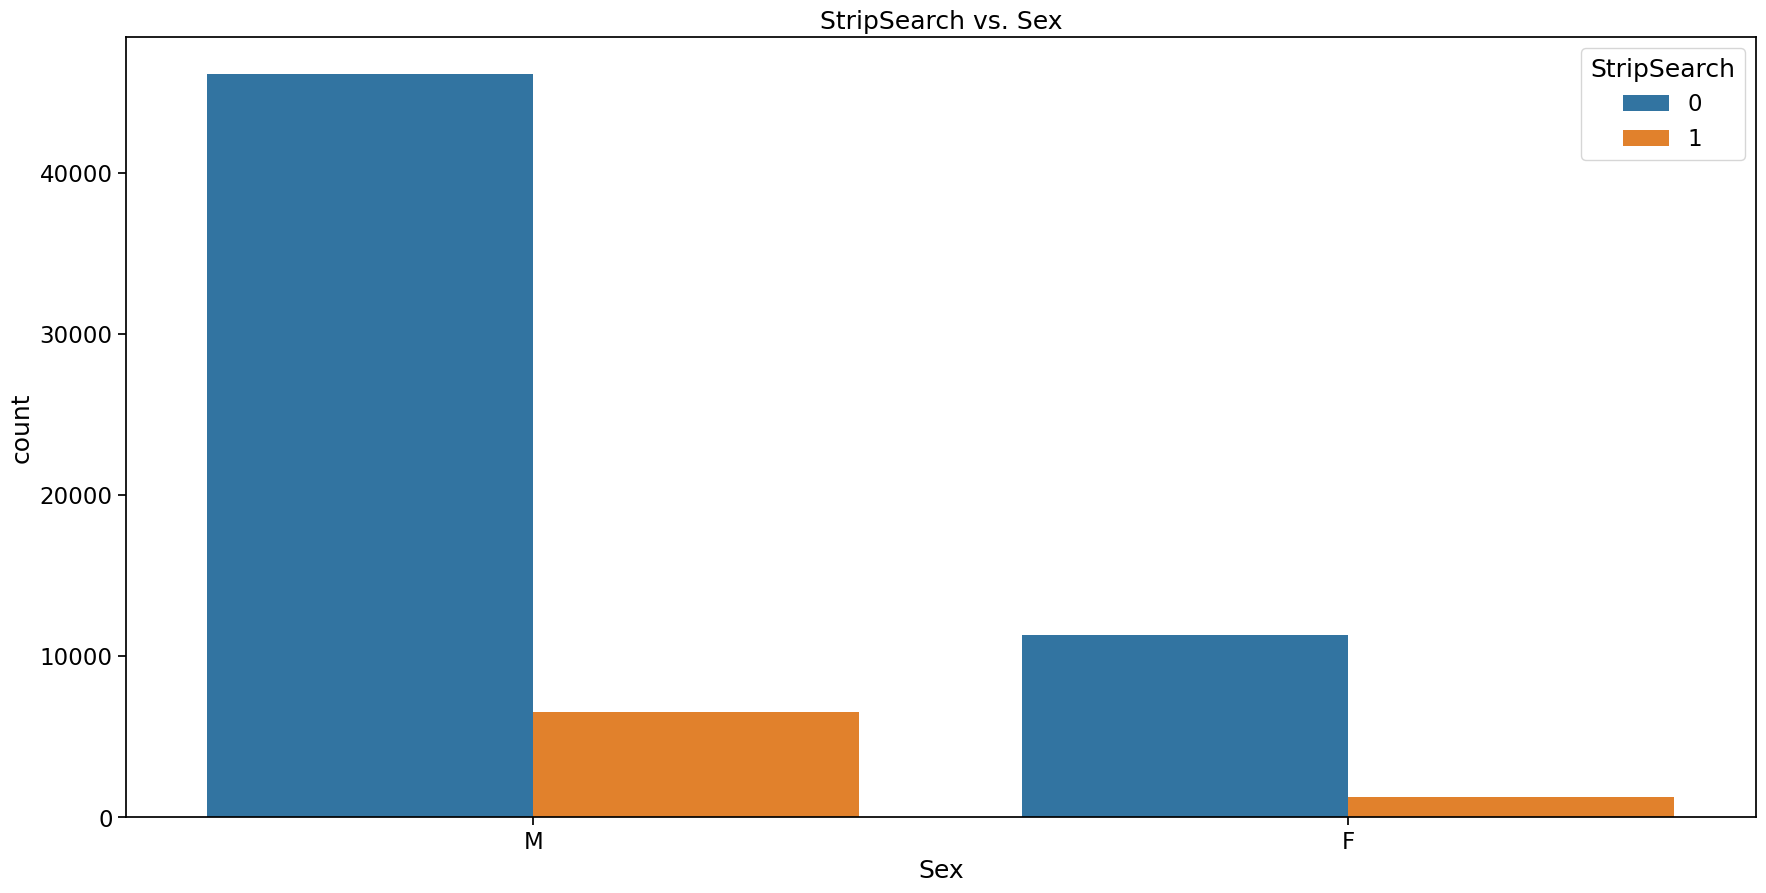

In [51]:
#Countplot of StripSearch vs. Sex
searchgroup = data_clean.groupby(['Sex', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Sex', hue = 'StripSearch')
plt.tight_layout()
plt.title('StripSearch vs. Sex')

Age_group__at_arrest_  StripSearch
Aged 17 and younger    0               2762
                       1                280
Aged 18 to 24 years    0               8689
                       1               1349
Aged 25 to 34 years    0              18173
                       1               2771
Aged 35 to 44 years    0              14143
                       1               2097
Aged 45 to 54 years    0               8160
                       1                905
Aged 55 to 64 years    0               4226
                       1                362
Aged 65 and older      0               1286
                       1                 36
dtype: int64


Text(0.5, 1.0, 'StripSearch vs. Age_group__at_arrest_')

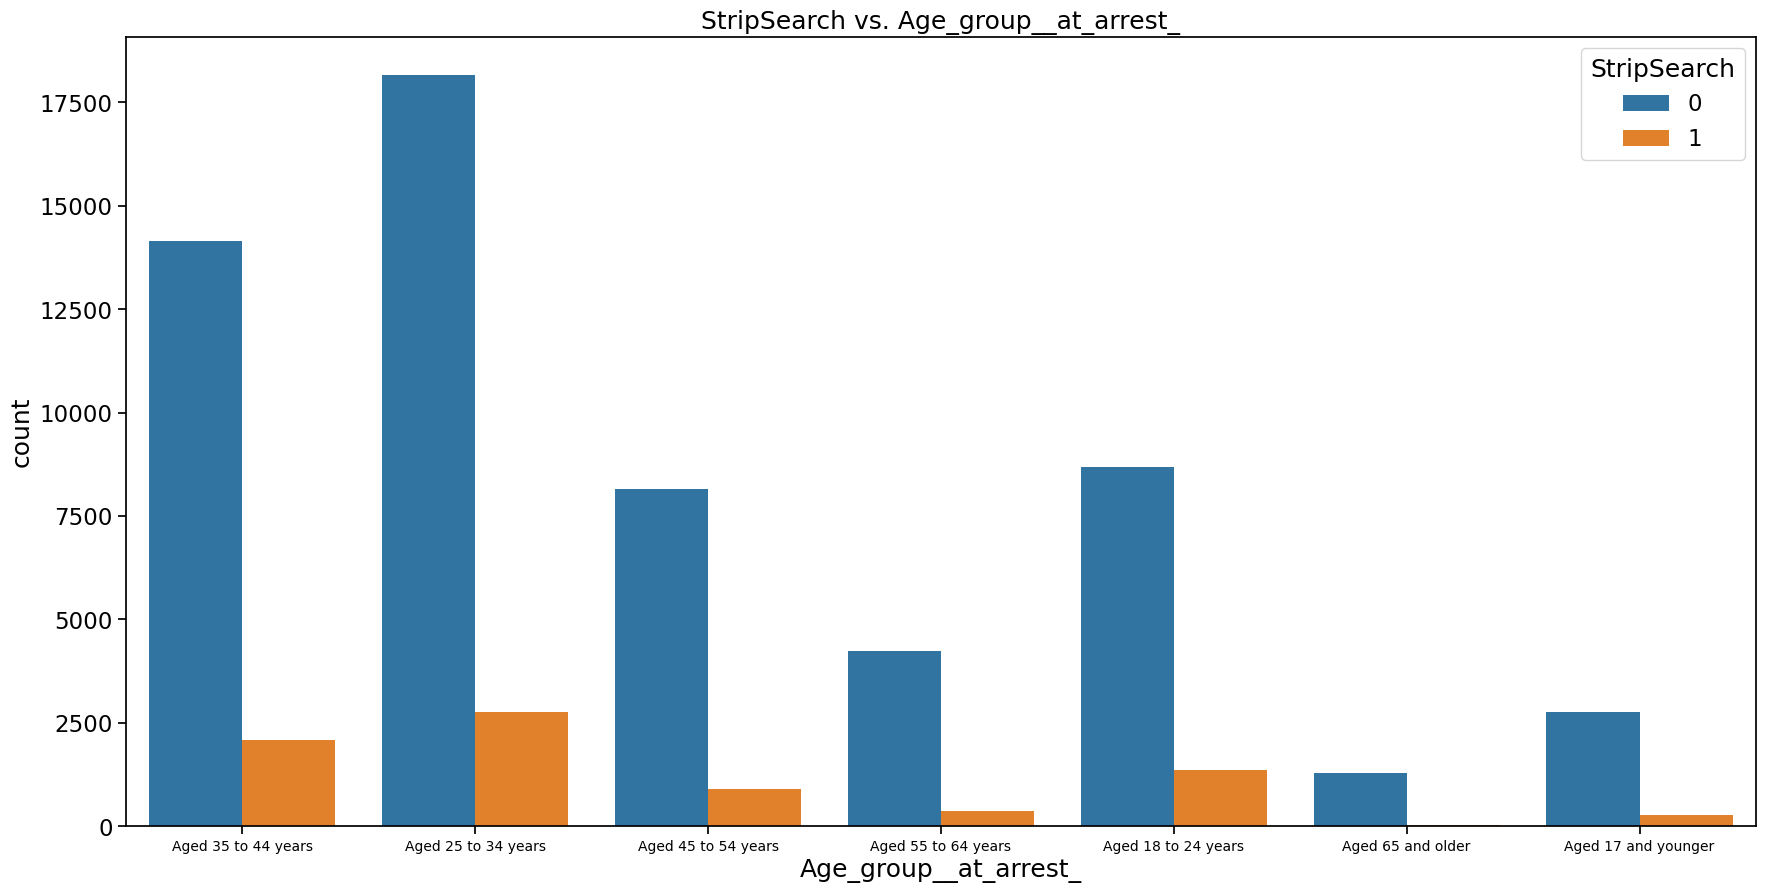

In [52]:
#Countplot of StripSearch vs. Age_group__at_arrest_
searchgroup = data_clean.groupby(['Age_group__at_arrest_', 'StripSearch'])
print(searchgroup.size())
plt.figure(figsize = (18, 9))
plt.xticks(fontsize = 10)
sns.set_context('notebook', font_scale = 1.5)
sns.countplot(data=data_clean, x='Age_group__at_arrest_', hue = 'StripSearch')
plt.tight_layout()
plt.title('StripSearch vs. Age_group__at_arrest_')

In [53]:
#Converte all variables from object type into int
num_data = data_clean.copy(deep = True)

num_data.loc[num_data.Perceived_Race == 'White', 'Perceived_Race'] = 1
num_data.loc[num_data.Perceived_Race == 'Black', 'Perceived_Race'] = 2
num_data.loc[num_data.Perceived_Race == 'Unknown or Legacy', 'Perceived_Race'] = 3
num_data.loc[num_data.Perceived_Race == 'East/Southeast Asian', 'Perceived_Race'] = 4
num_data.loc[num_data.Perceived_Race == 'South Asian', 'Perceived_Race'] = 5
num_data.loc[num_data.Perceived_Race == 'Middle-Eastern', 'Perceived_Race'] = 6
num_data.loc[num_data.Perceived_Race == 'Indigenous', 'Perceived_Race'] = 7
num_data.loc[num_data.Perceived_Race == 'Latino', 'Perceived_Race'] = 8

In [54]:
num_data.loc[num_data.Sex == 'M', 'Sex'] = 1
num_data.loc[num_data.Sex == 'F', 'Sex'] = 2

In [55]:
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 17 and younger', 'Age_group__at_arrest_'] = 1
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 18 to 24 years', 'Age_group__at_arrest_'] = 2
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 25 to 34 years', 'Age_group__at_arrest_'] = 3
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 35 to 44 years', 'Age_group__at_arrest_'] = 4
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 45 to 54 years', 'Age_group__at_arrest_'] = 5
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 55 to 64 years', 'Age_group__at_arrest_'] = 6
num_data.loc[num_data.Age_group__at_arrest_ == 'Aged 65 and older', 'Age_group__at_arrest_'] = 7

In [56]:
num_data = num_data.astype('int')
num_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65239 entries, 0 to 65275
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Perceived_Race         65239 non-null  int64
 1   Sex                    65239 non-null  int64
 2   Age_group__at_arrest_  65239 non-null  int64
 3   StripSearch            65239 non-null  int64
 4   Booked                 65239 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB


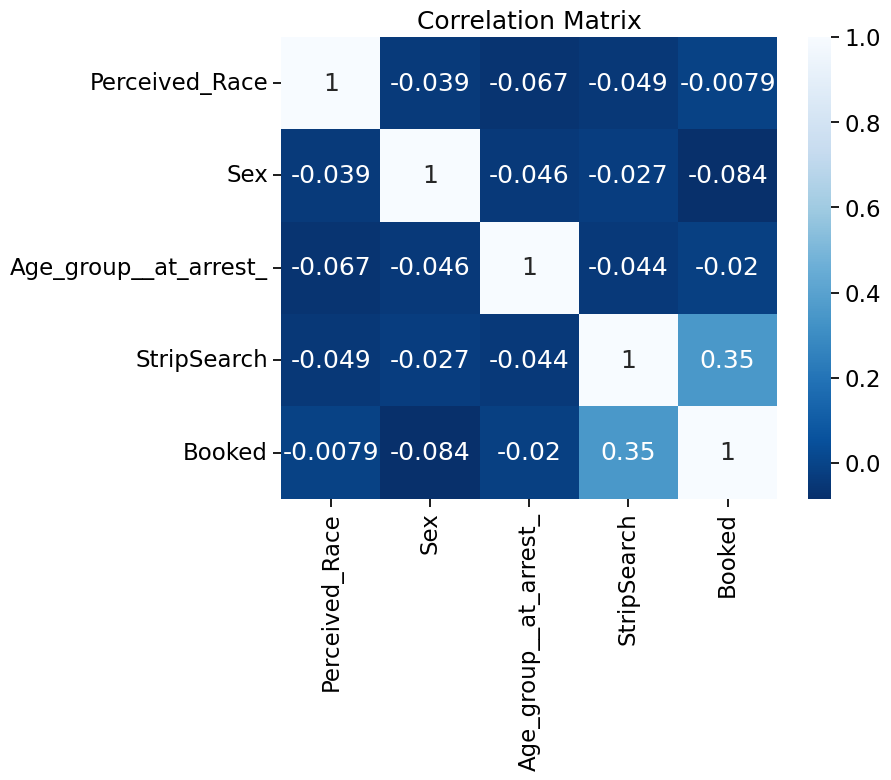

In [57]:
#Correlation Matrix
plt.figure(figsize = (8, 6))
corr_matrix = num_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues_r')
plt.title('Correlation Matrix')
plt.show()

In [58]:
data_clean_grouped = num_data.groupby(['Sex','Perceived_Race','Age_group__at_arrest_']).mean().reset_index()
data_clean_grouped

,Sex,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,1,1,1,0.067350,0.352855
1,1,1,2,0.133751,0.540752
2,1,1,3,0.150768,0.569142
3,1,1,4,0.145703,0.568983
4,1,1,5,0.113506,0.542597
5,1,1,6,0.095064,0.484461
6,1,1,7,0.023769,0.390492
7,1,2,1,0.141700,0.528340
8,1,2,2,0.181054,0.603298
9,1,2,3,0.152417,0.604739


In [59]:
#Check the assumption of normality
for i in range(1, 3):
    Booked = data_clean_grouped.loc[data_clean_grouped.Sex == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of sex', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Sex == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of sex', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of sex 1 
W test statistic: 0.9266993999481201 
P-value: 0.002189226681366563 

StripSearch of sex 1 
W test statistic: 0.9268404245376587 
P-value: 0.0022178515791893005 

Booked of sex 2 
W test statistic: 0.9364687204360962 
P-value: 0.005503933411091566 

StripSearch of sex 2 
W test statistic: 0.9362145662307739 
P-value: 0.0053704166784882545 



In [60]:
for i in range(1, 9):
    Booked = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of race', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of race', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of race 1 
W test statistic: 0.9290986061096191 
P-value: 0.2963760495185852 

StripSearch of race 1 
W test statistic: 0.9456801414489746 
P-value: 0.49585723876953125 

Booked of race 2 
W test statistic: 0.9510549902915955 
P-value: 0.5772020220756531 

StripSearch of race 2 
W test statistic: 0.9630455374717712 
P-value: 0.7727618217468262 

Booked of race 3 
W test statistic: 0.866902232170105 
P-value: 0.037970561534166336 

StripSearch of race 3 
W test statistic: 0.885810375213623 
P-value: 0.07036421447992325 

Booked of race 4 
W test statistic: 0.9282863140106201 
P-value: 0.2886688709259033 

StripSearch of race 4 
W test statistic: 0.9695091843605042 
P-value: 0.8700189590454102 

Booked of race 5 
W test statistic: 0.926249086856842 
P-value: 0.27012816071510315 

StripSearch of race 5 
W test statistic: 0.9586115479469299 
P-value: 0.7001687288284302 

Booked of race 6 
W test statistic: 0.9014165997505188 
P-value: 0.11825280636548996 

StripSearch of race 6 
W t

In [61]:
for i in range(1, 8):
    Booked = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
    Wtest, Pval = stats.shapiro(Booked)
    print('Booked of age group', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')
    
    StripSearch = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
    Wtest, Pval = stats.shapiro(StripSearch)
    print('StripSearch of age group', i, '\n' 'W test statistic:', Wtest, '\n' 'P-value:', Pval, '\n')

Booked of age group 1 
W test statistic: 0.9594866037368774 
P-value: 0.6524813175201416 

StripSearch of age group 1 
W test statistic: 0.7980818748474121 
P-value: 0.00256865075789392 

Booked of age group 2 
W test statistic: 0.9380999803543091 
P-value: 0.32638856768608093 

StripSearch of age group 2 
W test statistic: 0.9345966577529907 
P-value: 0.2879940867424011 

Booked of age group 3 
W test statistic: 0.9079998135566711 
P-value: 0.10804624110460281 

StripSearch of age group 3 
W test statistic: 0.9498445987701416 
P-value: 0.4872291386127472 

Booked of age group 4 
W test statistic: 0.9112675786018372 
P-value: 0.12197845429182053 

StripSearch of age group 4 
W test statistic: 0.9781230092048645 
P-value: 0.946945309638977 

Booked of age group 5 
W test statistic: 0.9226506948471069 
P-value: 0.1860736459493637 

StripSearch of age group 5 
W test statistic: 0.952843427658081 
P-value: 0.5360305905342102 

Booked of age group 6 
W test statistic: 0.9273226857185364 
P-

In [62]:
#Welch's T-test
print('Welch t-test of booked(race):')
Booked_1 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 1]['Booked']
Booked_2 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 2]['Booked']
Booked_4 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 4]['Booked']
Booked_5 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 5]['Booked']
Booked_6 = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == 6]['Booked']

W_stat, p_val = stats.ttest_ind(Booked_1, Booked_2, equal_var = False)
print('Welch t-test statistic:', W_stat)
print('P-value:', p_val)

Welch t-test of booked(race):
Welch t-test statistic: -0.9225875633582311
P-value: 0.36476236213079505


In [63]:
print('Welch t-test of Booked(race):')
for i in [1, 2, 4, 5, 6]:
    j = i + 1
    if j in [1, 2, 4, 5, 6]:
        Booked[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
        Booked[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['Booked']
        W_stat, p_val = stats.ttest_ind(Booked[i], Booked[j], equal_var = False)
        print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
        print('P-value:', p_val)

W_stat, p_val = stats.ttest_ind(Booked[2], Booked[4], equal_var = False)
print('Welch t-test statistic of:', 2, 'and', 4, 'is', W_stat)
print('P-value:', p_val)

Welch t-test of Booked(race):
Welch t-test statistic of: 1 and 2 is -0.9225875633582311
P-value: 0.36476236213079505
Welch t-test statistic of: 4 and 5 is -0.18512992031352524
P-value: 0.8545853879868112
Welch t-test statistic of: 5 and 6 is 0.09633251991572506
P-value: 0.9240267557315233
Welch t-test statistic of: 2 and 4 is 2.608916848956554
P-value: 0.01537551506985069


/tmp/ipykernel_29/2407141936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['Booked']
/tmp/ipykernel_29/2407141936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['Booked']
/tmp/ipykernel_29/2407141936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_gro

In [64]:
print('Welch t-test of Booked(age):')
for i in range(1, 7):
    j = i + 1
    Booked[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
    Booked[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['Booked']
    W_stat, p_val = stats.ttest_ind(Booked[i], Booked[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of Booked(age):
Welch t-test statistic of: 1 and 2 is -3.323107146675106
P-value: 0.003021867286088903
Welch t-test statistic of: 2 and 3 is -0.5670529716463293
P-value: 0.5749308887538325
Welch t-test statistic of: 3 and 4 is 0.8585813704875908
P-value: 0.39767054878229946
Welch t-test statistic of: 4 and 5 is 0.7448763752591496
P-value: 0.46214620180111665
Welch t-test statistic of: 5 and 6 is 1.460988915184134
P-value: 0.15720283305047317
Welch t-test statistic of: 6 and 7 is 1.0861491364473763
P-value: 0.2860779776540926


/tmp/ipykernel_29/4235409267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['Booked']
/tmp/ipykernel_29/4235409267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['Booked']
/tmp/ipykernel_29/4235409267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Booked[j] = 

In [65]:
print('Welch t-test of StripSearch(race):')
for i in range(1, 8):
    j = i + 1
    StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
    StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['StripSearch']
    W_stat, p_val = stats.ttest_ind(StripSearch[i], StripSearch[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of StripSearch(race):
Welch t-test statistic of: 1 and 2 is -0.05276858279135227
P-value: 0.9583217695033168
Welch t-test statistic of: 2 and 3 is 0.9679460027553068
P-value: 0.342145195871865
Welch t-test statistic of: 3 and 4 is 1.8909260582254646
P-value: 0.07097395577662255
Welch t-test statistic of: 4 and 5 is -0.3261318020810371
P-value: 0.7469352737059293
Welch t-test statistic of: 5 and 6 is 0.5828187549592746
P-value: 0.565040441542044
Welch t-test statistic of: 6 and 7 is -3.277080698196396
P-value: 0.004566101089849111
Welch t-test statistic of: 7 and 8 is 2.234865570782277
P-value: 0.03605380134437146


/tmp/ipykernel_29/2092536692.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == i]['StripSearch']
/tmp/ipykernel_29/2092536692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Perceived_Race == j]['StripSearch']
/tmp/ipykernel_29/2092536692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripS

In [66]:
print('Welch t-test of StripSearch(age):')
for i in range(2, 6):
    j = i + 1
    StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
    StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['StripSearch']
    W_stat, p_val = stats.ttest_ind(StripSearch[i], StripSearch[j], equal_var = False)
    print('Welch t-test statistic of:', i, 'and', j, 'is', W_stat)
    print('P-value:', p_val)

Welch t-test of StripSearch(age):
Welch t-test statistic of: 2 and 3 is 0.6530478027515236
P-value: 0.5188076692385815
Welch t-test statistic of: 3 and 4 is 0.09238274635004526
P-value: 0.9270189810712001
Welch t-test statistic of: 4 and 5 is 1.640596530283821
P-value: 0.11156871874333368
Welch t-test statistic of: 5 and 6 is 1.7366380430343333
P-value: 0.09271151615227388


/tmp/ipykernel_29/1312401784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[i] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == i]['StripSearch']
/tmp/ipykernel_29/1312401784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  StripSearch[j] = data_clean_grouped.loc[data_clean_grouped.Age_group__at_arrest_ == j]['StripSearch']


In [67]:
data2_grouped = data2.groupby(['Sex','Perceived_Race','Age_group__at_arrest_']).mean().reset_index()
pd.set_option('display.max_rows', 200)
data2_grouped

,Sex,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,F,Black,Aged 17 and younger,0.037975,0.367089
1,F,Black,Aged 18 to 24 years,0.118911,0.462751
2,F,Black,Aged 25 to 34 years,0.080416,0.475875
3,F,Black,Aged 35 to 44 years,0.072917,0.463542
4,F,Black,Aged 45 to 54 years,0.116541,0.447368
5,F,Black,Aged 55 to 64 years,0.024096,0.301205
6,F,Black,Aged 65 and older,0.000000,0.384615
7,F,East/Southeast Asian,Aged 17 and younger,0.024390,0.268293
8,F,East/Southeast Asian,Aged 18 to 24 years,0.037594,0.278195
9,F,East/Southeast Asian,Aged 25 to 34 years,0.026316,0.378947


In [68]:
data2_grouped['Sex'].unique()

array(['F', 'M'], dtype=object)

In [69]:
data2_grouped['Perceived_Race'].unique()

array(['Black', 'East/Southeast Asian', 'Indigenous', 'Latino',
       'Middle-Eastern', 'South Asian', 'Unknown or Legacy', 'White'],
      dtype=object)

In [70]:
data2_grouped['Age_group__at_arrest_'].unique()

array(['Aged 17 and younger', 'Aged 18 to 24 years',
       'Aged 25 to 34 years', 'Aged 35 to 44 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 and older'],
      dtype=object)

In [71]:
############# Check ANOVA assumptions: Independence, Normality, Equal Variance

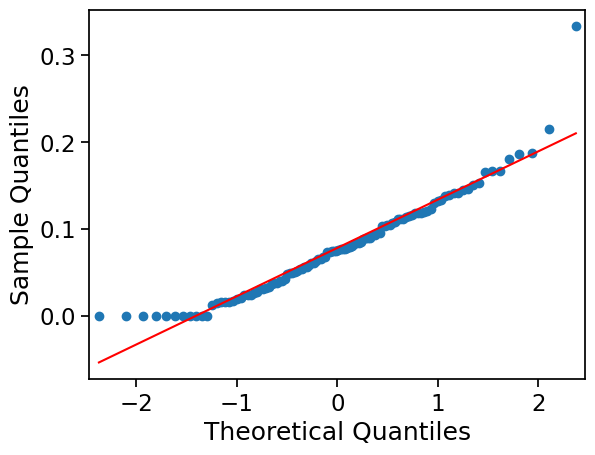

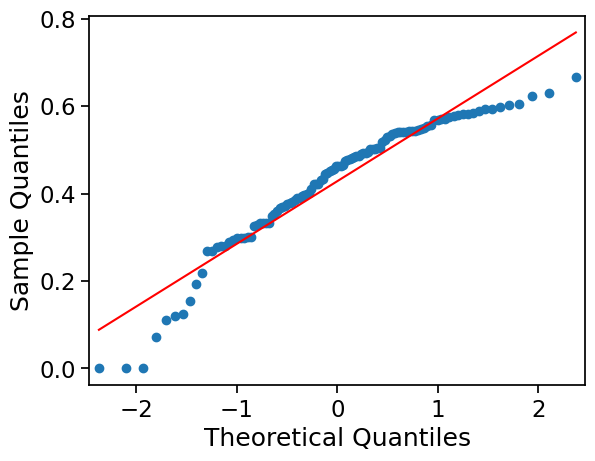

In [72]:
# q-q plot

from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(data2_grouped['StripSearch'], line='s')
pyplot.show()

qqplot(data2_grouped['Booked'], line='s')
pyplot.show()

In [73]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Sex'] == 'F'],
             data2_grouped['StripSearch'][data2_grouped['Sex'] == 'M'])

LeveneResult(statistic=0.17428377143524365, pvalue=0.6771461196232877)

In [74]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Black'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Latino'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Indigenous'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Middle-Eastern'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'Unknown or Legacy'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'East/Southeast Asian'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'South Asian'],
             data2_grouped['StripSearch'][data2_grouped['Perceived_Race'] == 'White'])

LeveneResult(statistic=1.7367781021623563, pvalue=0.10839180778893559)

In [75]:
stats.levene(data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 17 and younger'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 18 to 24 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 25 to 34 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 35 to 44 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 45 to 54 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 55 to 64 years'],
             data2_grouped['StripSearch'][data2_grouped['Age_group__at_arrest_'] == 'Aged 65 and older'])

LeveneResult(statistic=0.8975360247027538, pvalue=0.49968730830203956)

In [76]:
# Independence : an individual can only belong in one group.
# Also, this means that the data is not repeated measures (not collected through time)

In [77]:
############### ANOVA and Tukey HSD with StripSearch Mean

In [78]:
def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''


def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.2}'

In [79]:
# Samples for Perceived Race
sample_race0 = data2_grouped[data2_grouped['Perceived_Race'] == 'Middle-Eastern']['StripSearch']
sample_race1 = data2_grouped[data2_grouped['Perceived_Race'] == 'Indigenous']['StripSearch']
sample_race2 = data2_grouped[data2_grouped['Perceived_Race'] == 'Latino']['StripSearch']

selected_race_strip = data2_grouped[(data2_grouped['Perceived_Race'] == 'Middle-Eastern')|
                              (data2_grouped['Perceived_Race'] == 'Indigenous')|
                              (data2_grouped['Perceived_Race'] == 'Latino')]

# One-way ANOVA
statistic, pvalue = f_oneway(sample_race0, sample_race1, sample_race2)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

# 1 way anova with tukey hsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=selected_race_strip['StripSearch'],
                          groups=selected_race_strip['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

One-way ANOVA: s = 6.533160010929294, p = 0.0035719108472346875
The p-value is 0.0036 (**)
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
Indigenous         Latino  -0.0605 0.0336  -0.117 -0.004   True
Indigenous Middle-Eastern  -0.0805 0.0036  -0.137 -0.024   True
    Latino Middle-Eastern    -0.02 0.6664 -0.0765 0.0365  False
---------------------------------------------------------------


In [80]:
# Samples for Age at Arrest

sample_age0 = data2_grouped[data2_grouped['Age_group__at_arrest_'] == 'Aged 45 to 54 years']['StripSearch']
sample_age1 = data2_grouped[data2_grouped['Age_group__at_arrest_'] == 'Aged 55 to 64 years']['StripSearch']

selected_age = data2_grouped[(data2_grouped['Age_group__at_arrest_'] == 'Aged 45 to 54 years')|
                             (data2_grouped['Age_group__at_arrest_'] == 'Aged 55 to 64 years')]

# One-way ANOVA
statistic, pvalue = f_oneway(sample_age0, sample_age1)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

# 1 way anova with tukey hsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=selected_age['StripSearch'],
                          groups=selected_age['Age_group__at_arrest_'],
                          alpha=0.05)

#display results
print(tukey)

One-way ANOVA: s = 3.015911692514117, p = 0.092711069093621
The p-value is 0.093 (.)
             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
Aged 45 to 54 years Aged 55 to 64 years  -0.0232 0.0927 -0.0505 0.0041  False
-----------------------------------------------------------------------------


In [81]:
############### ANOVA and Tukey HSD with Booked Mean

In [82]:
# Samples for Perceived Race
sample_race0 = data2_grouped[data2_grouped['Perceived_Race'] == 'Black']['Booked']
sample_race1 = data2_grouped[data2_grouped['Perceived_Race'] == 'East/Southeast Asian']['Booked']

selected_race_booked = data2_grouped[(data2_grouped['Perceived_Race'] == 'Black')|
                              (data2_grouped['Perceived_Race'] == 'East/Southeast Asian')]

# One-way ANOVA
statistic, pvalue = f_oneway(sample_race0, sample_race1)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

# 1 way anova with tukey hsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=selected_race_booked['Booked'],
                          groups=selected_race_booked['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

One-way ANOVA: s = 6.80644712476939, p = 0.014861059705846742
The p-value is 0.015 (*)
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1        group2        meandiff p-adj   lower   upper  reject
------------------------------------------------------------------
 Black East/Southeast Asian  -0.1048 0.0149 -0.1874 -0.0222   True
------------------------------------------------------------------


In [83]:
# Samples for Age at Arrest
sample_age0 = data2_grouped[data2_grouped['Age_group__at_arrest_'] == 'Aged 17 and younger']['Booked']
sample_age1 = data2_grouped[data2_grouped['Age_group__at_arrest_'] == 'Aged 18 to 24 years']['Booked']

selected_age_booked = data2_grouped[(data2_grouped['Age_group__at_arrest_'] == 'Aged 17 and younger')|
                             (data2_grouped['Age_group__at_arrest_'] == 'Aged 18 to 24 years')]

# One-way ANOVA
statistic, pvalue = f_oneway(sample_age0, sample_age1)

print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

p_rounded = round_p_value(pvalue)
significance = get_significance(pvalue)
print(f'The p-value is {p_rounded} ({significance})')

# 1 way anova with tukey hsd

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=selected_age_booked['Booked'],
                          groups=selected_age_booked['Age_group__at_arrest_'],
                          alpha=0.05)

#display results
print(tukey)

One-way ANOVA: s = 11.04304110828316, p = 0.002353131511701673
The p-value is 0.0024 (**)
            Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1              group2       meandiff p-adj  lower  upper reject
---------------------------------------------------------------------------
Aged 17 and younger Aged 18 to 24 years   0.1517 0.0024 0.0585 0.245   True
---------------------------------------------------------------------------


In [84]:
####################Two-way ANOVA

In [85]:
selected_race_age_strip = selected_race_strip[(selected_race_strip['Age_group__at_arrest_'] == 'Aged 45 to 54 years')|
                             (selected_race_strip['Age_group__at_arrest_'] == 'Aged 55 to 64 years')]
selected_race_age_strip = selected_race_age_strip.reset_index()
selected_race_age_strip = selected_race_age_strip.drop(columns=['Sex','index'])
selected_race_age_strip

,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,Indigenous,Aged 45 to 54 years,0.076923,0.474359
1,Indigenous,Aged 55 to 64 years,0.121212,0.484848
2,Latino,Aged 45 to 54 years,0.047619,0.380952
3,Latino,Aged 55 to 64 years,0.000000,0.000000
4,Middle-Eastern,Aged 45 to 54 years,0.019608,0.294118
5,Middle-Eastern,Aged 55 to 64 years,0.000000,0.125000
6,Indigenous,Aged 45 to 54 years,0.138756,0.588517
7,Indigenous,Aged 55 to 64 years,0.074074,0.629630
8,Latino,Aged 45 to 54 years,0.039548,0.536723
9,Latino,Aged 55 to 64 years,0.060241,0.578313


In [86]:
model = ols('StripSearch ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)',
            data=selected_race_age_strip).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
# output

,sum_sq,df,F,PR(>F)
C(Perceived_Race),0.011683,2.0,4.565213,0.062359
C(Age_group__at_arrest_),0.000711,1.0,0.555398,0.484280
C(Perceived_Race):C(Age_group__at_arrest_),0.000081,2.0,0.031820,0.968843
Residual,0.007677,6.0,NaN,NaN


In [87]:
# 2 way anova with tukey hsd

interaction_groups = "("+selected_race_age_strip['Perceived_Race']+" , "+selected_race_age_strip['Age_group__at_arrest_']+")"

from statsmodels.stats.multicomp import MultiComparison

tukey_test = MultiComparison(selected_race_age_strip['StripSearch'],
                            interaction_groups)
tukey_result = tukey_test.tukeyhsd(0.05)

#display results
print(tukey_result)

                                Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                group1                                 group2                 meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------------
    (Indigenous , Aged 45 to 54 years)     (Indigenous , Aged 55 to 64 years)  -0.0102 0.9996 -0.1526 0.1322  False
    (Indigenous , Aged 45 to 54 years)         (Latino , Aged 45 to 54 years)  -0.0643 0.5279 -0.2066 0.0781  False
    (Indigenous , Aged 45 to 54 years)         (Latino , Aged 55 to 64 years)  -0.0777 0.3641 -0.2201 0.0646  False
    (Indigenous , Aged 45 to 54 years) (Middle-Eastern , Aged 45 to 54 years)  -0.0603 0.5821 -0.2027  0.082  False
    (Indigenous , Aged 45 to 54 years) (Middle-Eastern , Aged 55 to 64 years)  -0.0828 0.3129 -0.2252 0.0595  False
    (Indigenous , Aged 55 to 64 years)         (Latino , Aged 45 to 54 y

In [88]:
selected_race_age_booked = selected_race_booked[(selected_race_booked['Age_group__at_arrest_'] == 'Aged 17 and younger')|
                                         (selected_race_booked['Age_group__at_arrest_'] == 'Aged 18 to 24 years')]
selected_race_age_booked = selected_race_age_booked.reset_index()
selected_race_age_booked = selected_race_age_booked.drop(columns=['Sex','index'])
selected_race_age_booked

,Perceived_Race,Age_group__at_arrest_,StripSearch,Booked
0,Black,Aged 17 and younger,0.037975,0.367089
1,Black,Aged 18 to 24 years,0.118911,0.462751
2,East/Southeast Asian,Aged 17 and younger,0.024390,0.268293
3,East/Southeast Asian,Aged 18 to 24 years,0.037594,0.278195
4,Black,Aged 17 and younger,0.141700,0.528340
5,Black,Aged 18 to 24 years,0.181054,0.603298
6,East/Southeast Asian,Aged 17 and younger,0.054264,0.348837
7,East/Southeast Asian,Aged 18 to 24 years,0.118326,0.503608


In [89]:
#perform two-way ANOVA for race and age with booked
model2 = ols('Booked ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)',
             data=selected_race_age_strip).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2
# output

,sum_sq,df,F,PR(>F)
C(Perceived_Race),0.076069,2.0,0.731715,0.519563
C(Age_group__at_arrest_),0.021502,1.0,0.413657,0.543901
C(Perceived_Race):C(Age_group__at_arrest_),0.020077,2.0,0.193126,0.829307
Residual,0.311881,6.0,NaN,NaN


In [90]:
# 2 way anova with tukey hsd

interaction_groups = "("+selected_race_age_booked['Perceived_Race']+" , "+selected_race_age_booked['Age_group__at_arrest_']+")"

from statsmodels.stats.multicomp import MultiComparison

tukey_test = MultiComparison(selected_race_age_booked['Booked'],
                            interaction_groups)
tukey_result = tukey_test.tukeyhsd(0.05)

#display results
print(tukey_result)

                                      Multiple Comparison of Means - Tukey HSD, FWER=0.05                                      
                   group1                                       group2                    meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------------------------------------------------------------
               (Black , Aged 17 and younger)                (Black , Aged 18 to 24 years)   0.0853  0.872 -0.3767 0.5473  False
               (Black , Aged 17 and younger) (East/Southeast Asian , Aged 17 and younger)  -0.1391  0.645 -0.6012 0.3229  False
               (Black , Aged 17 and younger) (East/Southeast Asian , Aged 18 to 24 years)  -0.0568 0.9548 -0.5188 0.4052  False
               (Black , Aged 18 to 24 years) (East/Southeast Asian , Aged 17 and younger)  -0.2245 0.3289 -0.6865 0.2376  False
               (Black , Aged 18 to 24 years) (East/Southeast Asian , Aged 18 to 24 years)  -0.1421 0.631

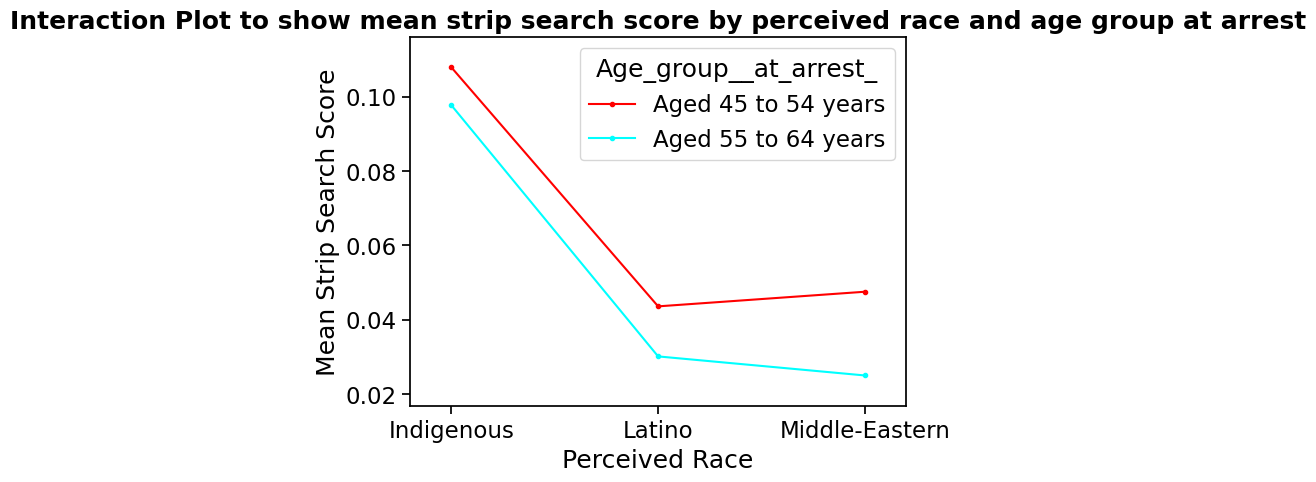

In [91]:
fig = interaction_plot(x=selected_race_age_strip['Perceived_Race'],
                       trace=selected_race_age_strip['Age_group__at_arrest_'], 
                       response=selected_race_age_strip['StripSearch'])
plt.rc('legend', fontsize = 10)
plt.ylabel('Mean Strip Search Score')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean strip search score by perceived race and age group at arrest', fontweight='bold')
plt.show()

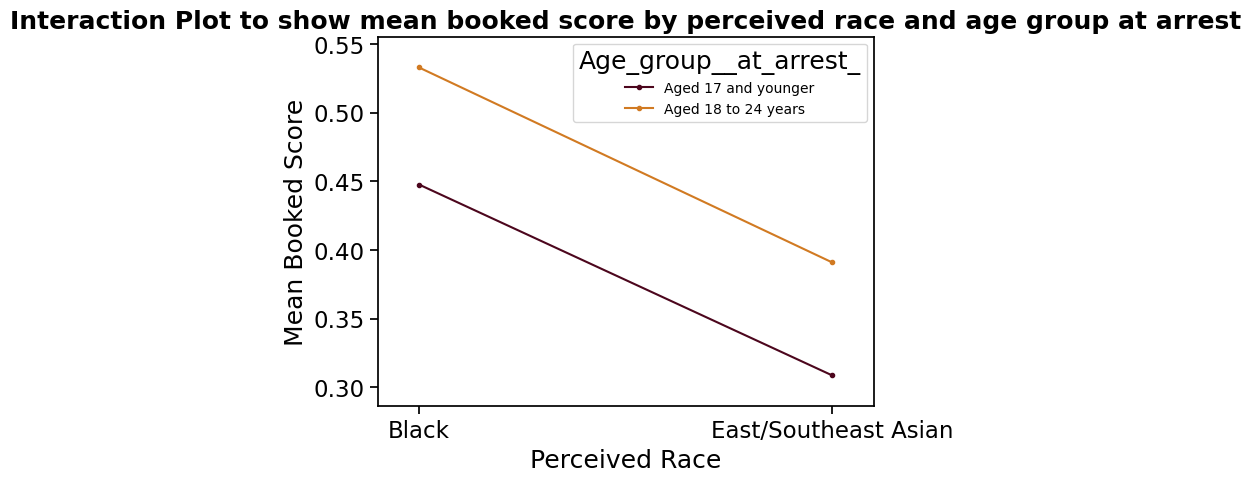

In [92]:
fig = interaction_plot(x=selected_race_age_booked['Perceived_Race'], 
                       trace=selected_race_age_booked['Age_group__at_arrest_'],
                       response=selected_race_age_booked['Booked'], colors=['#4c061d','#d17a22'])
plt.ylabel('Mean Booked Score')
plt.xlabel('Perceived Race')
plt.title('Interaction Plot to show mean booked score by perceived race and age group at arrest', fontweight='bold')
plt.show()

In [93]:
################### Reach The End